In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from statsmodels.tsa.seasonal import seasonal_decompose


In [2]:
# Import data
sample_data = pd.read_csv('C:/Users/Rounak Pyne Study/Desktop/gold_price_data.csv')
sample_data.head(2)

,Date,Value
0,1970-01-01,35.2
1,1970-04-01,35.1


In [3]:
sample_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10787 entries, 0 to 10786
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    10787 non-null  object 
 1   Value   10787 non-null  float64
dtypes: float64(1), object(1)
memory usage: 168.7+ KB


In [4]:
# Converting to Date time
sample_data['Date']=pd.to_datetime(sample_data['Date'])

In [5]:
# Extract Year
sample_data['Year'] = pd.DatetimeIndex(sample_data['Date']).year
sample_data.head(2)

,Date,Value,Year
0,1970-01-01,35.2,1970
1,1970-04-01,35.1,1970


In [6]:
# Extract Month
sample_data['Month'] = pd.DatetimeIndex(sample_data['Date']).month
sample_data.head(2)

,Date,Value,Year,Month
0,1970-01-01,35.2,1970,1
1,1970-04-01,35.1,1970,4


In [7]:
# Checking unique Year
sample_data['Year'].unique()

array([1970, 1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980,
       1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991,
       1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002,
       2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013,
       2014, 2015, 2016, 2017, 2018, 2019, 2020], dtype=int64)

In [8]:
# Checking unique Month
sample_data['Month'].unique()

array([ 1,  4,  7, 10, 12,  2,  3,  5,  6,  8,  9, 11], dtype=int64)

In [9]:
# taking only 10 years of data.
filter1 = sample_data['Year'].between(2015,2019).values
data_df = sample_data[filter1]

In [10]:
# checking the year
data_df['Year'].unique()

array([2015, 2016, 2017, 2018, 2019], dtype=int64)

In [11]:
# Sales for each year using crosstabulation
Price = pd.crosstab(index=data_df['Year'],columns=data_df['Month'],values=data_df['Value'],aggfunc='sum').melt()['value']
MonthNames=['Jan','Feb','Mar','Apr','May', 'Jun', 'Jul', 'Aug', 'Sep','Oct','Nov','Dec']*5

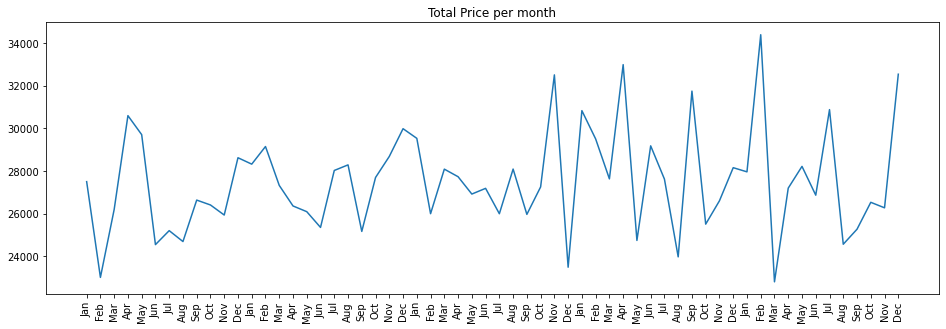

In [15]:
#Ploting the data
Price.plot(kind='line', figsize=(16,5), title='Total Price per month')
plotLabels=plt.xticks(np.arange(0,60,1),MonthNames,rotation = 90)

In [13]:
Price.values

array([27494.75, 23007.5 , 26190.85, 30587.65, 29697.4 , 24543.75,
       25198.15, 24687.15, 26630.5 , 26401.3 , 25929.85, 28615.1 ,
       28315.15, 29141.65, 27318.85, 26355.2 , 26087.5 , 25349.6 ,
       28018.65, 28280.3 , 25162.05, 27689.85, 28676.6 , 29976.45,
       29523.95, 25993.1 , 28080.9 , 27725.65, 26912.9 , 27180.85,
       25990.85, 28083.85, 25960.65, 27247.55, 32498.5 , 23484.5 ,
       30822.7 , 29496.25, 27625.1 , 32978.55, 24739.7 , 29172.65,
       27614.55, 23969.45, 31737.6 , 25503.4 , 26597.95, 28149.3 ,
       27954.05, 34380.4 , 22799.75, 27191.55, 28210.25, 26860.8 ,
       30870.35, 24561.55, 25265.2 , 26526.  , 26268.15, 32529.85])

C:\Users\ROUNAK~1\AppData\Local\Temp/ipykernel_1376/1356852785.py:3: FutureWarning: the 'freq'' keyword is deprecated, use 'period' instead
  result = seasonal_decompose(series, model='multiplicative', freq=12)


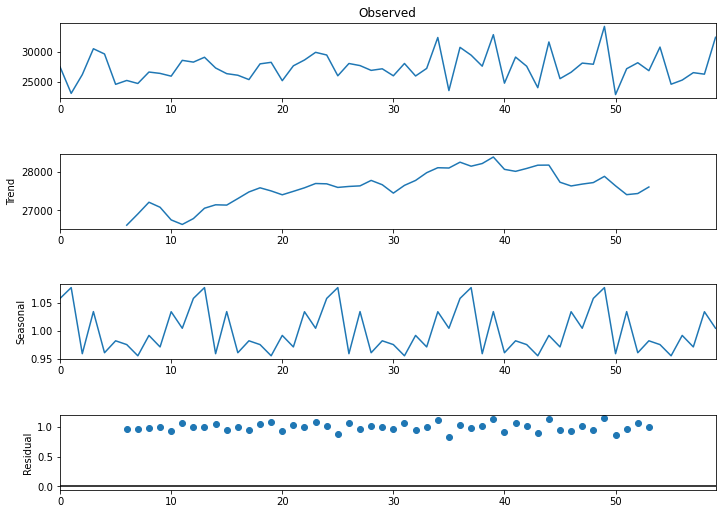

In [16]:
from statsmodels.tsa.seasonal import seasonal_decompose
series = Price.values
result = seasonal_decompose(series, model='multiplicative', freq=12)
result.plot()
CurrentFig=plt.gcf()
CurrentFig.set_size_inches(11,8)
plt.show()

In [18]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
SarimaxModel = SARIMAX(Price,  
                        order = (1, 1, 4),  
                        seasonal_order =(1, 0, 0, 12))
PriceModel = SarimaxModel.fit()

C:\ProgramData\Anaconda3.1\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


In [20]:
# forecasting 
forecast = PriceModel.predict(start = 0, end = len(Price)+12, typ = 'levels').rename('Forecast')
print("Next 12 months forecast:", forecast[-12:])
MAPE=np.mean(abs(Price-forecast)/Price)*100
print('#### Accuracy of model:', round(100-MAPE,2), '####')

Next 12 months forecast: 61    29818.616212
62    30472.153828
63    28806.337368
64    29391.339878
65    29180.144892
66    29109.480093
67    29356.885686
68    29346.082212
69    29276.434838
70    29292.936917
71    28993.934440
72    29116.926165
Name: Forecast, dtype: float64
#### Accuracy of model: 90.37 ####


<AxesSubplot:title={'center':'Time Series Sales Forecasts'}>

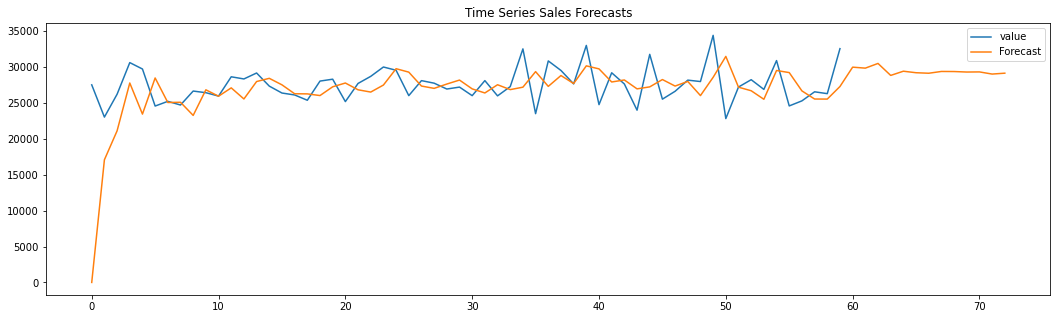

In [30]:
Price.plot(figsize = (18, 5), legend = True, title='Time Series Sales Forecasts')
forecast.plot(legend = True, figsize=(18,5))
#MonthNames=MonthNames+MonthNames[0:12]
#plotLabels=plt.xticks(np.arange(0,72,1),MonthNames, rotation=90)